In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import pyrtools as pt
import plenoptic as po
import scipy.io as sio
import os.path as op


torch.__version__
numpy = lambda x: x.detach().cpu().numpy().squeeze()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.cat([torch.ones(3).flatten(),torch.ones(3).flatten(),torch.ones(3).flatten()])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [2]:
image = plt.imread('../data/nuts.pgm').astype(float)/255.
im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)
pyr = po.simul.Steerable_Pyramid_Freq((256,256), height=3, order=1, is_complex=True)
pp=pyr.forward(im0)
print([val.shape for val in pp.values()])

[torch.Size([1, 1, 256, 256]), torch.Size([1, 1, 256, 256, 2]), torch.Size([1, 1, 256, 256, 2]), torch.Size([1, 1, 128, 128, 2]), torch.Size([1, 1, 128, 128, 2]), torch.Size([1, 1, 64, 64, 2]), torch.Size([1, 1, 64, 64, 2]), torch.Size([1, 1, 32, 32])]


/Users/kathrynbonnen/Documents/work-repos/plenoptic/plenoptic/simulate/canonical_computations/steerable_pyramid_freq.py:356: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/aten/src/ATen/native/SpectralOps.cpp:590.)
  imdft = torch.rfft(x, signal_ndim=2, onesided=False, normalized=self.fft_normalize)
/Users/kathrynbonnen/Documents/work-repos/plenoptic/plenoptic/simulate/canonical_computations/steerable_pyramid_freq.py:363: UserWarning: The function torch.ifft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.ifft or torch.fft.ifftn. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/wo

In [4]:
import time
model = po.simul.Portilla_Simoncelli([256,256],n_scales=4, n_orientations=4, spatial_corr_width=5)
image = plt.imread('../data/nuts.pgm').astype(float)
im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)

start = time.time()
y = model.forward(im0)
end = time.time()
print(end - start)

print('tmp' in ['tmp','help'])

0.19128179550170898
True


/Users/kathrynbonnen/Documents/work-repos/plenoptic/plenoptic/simulate/models/portilla_simoncelli.py:300: UserWarning: The function torch.fft is deprecated and will be removed in PyTorch 1.8. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.fftn. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/aten/src/ATen/native/SpectralOps.cpp:567.)
  fourier = mult**2*batch_fftshift(torch.fft(im,2).unsqueeze(0)).squeeze()


In [5]:
import glob
directory = '/Users/kathrynbonnen/Dropbox/NYU/Texture2018/imageLibraries/cropped512-gray-jpg/'
jpg = glob.glob(f'{directory}*.jpg')

In [7]:
# image = plt.imread('../data/nuts.pgm').astype(float)/255.
# im0 = torch.tensor(image[:256,:256], requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)    

image = plt.imread(directory+'5DmkII_3975.jpg').astype(float).mean(axis=2)/255.
im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)    
model = po.simul.Portilla_Simoncelli([256,256],n_scales=4, n_orientations=4, spatial_corr_width=9,use_true_correlations=False)
met = po.synth.Metamer(im0[0,0,:256,:256], model)
m=met.synthesize(learning_rate=.001,loss_thresh=20,loss_change_thresh=100,max_iter=600,coarse_to_fine='together',optimizer='Adam')



 86%|████████▌ | 516/600 [06:14<01:00,  1.38it/s, current_scale=all, current_scale_loss=19.5, gradient_norm=6.9220e+00, learning_rate=0.0005, loss=1.9528e+01]               


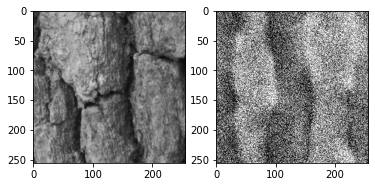

In [18]:
fig=plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(image[:256,:256],cmap='gray',vmin=0,vmax=1)

fig.add_subplot(1,2,2)
plt.imshow(m[0].squeeze().detach().numpy(),cmap='gray',vmin=0,vmax=1)



In [21]:
coeffs = np.load('coeff_library.npy')
coeffs_mean = torch.from_numpy(coeffs.mean(axis=1))
coeffs_std = torch.from_numpy(coeffs.std(axis=1))
coeffs_std[coeffs_std<1e-3]=1
# coeffs_std=1

image = plt.imread(directory+'5DmkII_3975.jpg').astype(float).mean(axis=2)/255.
im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)    
model = po.simul.Portilla_Simoncelli([256,256],n_scales=4, n_orientations=4, Na=9,
                                      normalize=True, normalization_mu=coeffs_mean, normalization_std=coeffs_std)
met = po.synth.Metamer(im0[0,0,:256,:256], model)
m=met.synthesize(learning_rate=.01,loss_thresh=20,loss_change_thresh=100,max_iter=400,coarse_to_fine='together',optimizer = 'Adam')

fig=plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(image[:256,:256],cmap='gray',vmin=0,vmax=1)

fig.add_subplot(1,2,2)
plt.imshow(m[0].squeeze().detach().numpy(),cmap='gray',vmin=0,vmax=1)


 23%|██▎       | 93/400 [01:17<04:15,  1.20it/s, current_scale=3, current_scale_loss=33.1, gradient_norm=1.2653e+02, learning_rate=0.01, loss=4.8384e+02]                  


KeyboardInterrupt: 

In [36]:
for file in glob.glob("../data/*.pgm"):
    print(file)
    for n_scales in [1,2,3,4]:
        for n_orientations in [2,3,4]:
            for Na in [3,5,7,9]:
                path = op.dirname(file)
                base = op.basename(file)
                torch.set_default_dtype(torch.float64)
                x = plt.imread(file).copy()
                im0 = torch.Tensor(x).unsqueeze(0).unsqueeze(0)
                ps = po.simul.Portilla_Simoncelli(x.shape[-2:], n_scales = n_scales, n_orientations = n_orientations,Na=Na)
                python_vector = ps(im0)
                
                outfile = f'{path}/portilla_simoncelli_test_vectors/{base[0:-4]}-scales{n_scales}-ori{n_orientations}-spat{Na}'
                np.save(outfile,python_vector)

../data/sawtooth.pgm
../data/reptil_skin.pgm
../data/curie.pgm
../data/checkerboard.pgm
../data/metal.pgm
../data/einstein.pgm
../data/nuts.pgm


In [37]:
n = np.load(f'{outfile}.npy')

In [38]:
print(n)

[1.08017853e+02 8.47959458e+03 5.63459299e-01 ... 0.00000000e+00
 0.00000000e+00 1.11209554e+02]
